# Neural Networks with Keras

In [18]:
from __future__ import print_function
import random
import numpy as np
import pandas as pd
from math import sin

# pip install keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD   # Stochastic Gradient Descent

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import sklearn.model_selection as cv

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 8)

### Exercise: Perform regression the following data
Hints:
* Try adding a hidden layer
* Try lowering the learning rate and using more epochs

In [19]:
def f(x):
    return x ** 2 * np.sin(x**2)

# Sine data
X = np.linspace(2, np.pi, 1000).reshape(-1,1)
y = np.array(list(map(f, X)))

print(X.shape, y.shape)

(1000, 1) (1000, 1)


Training..
0.126464658446
Complete


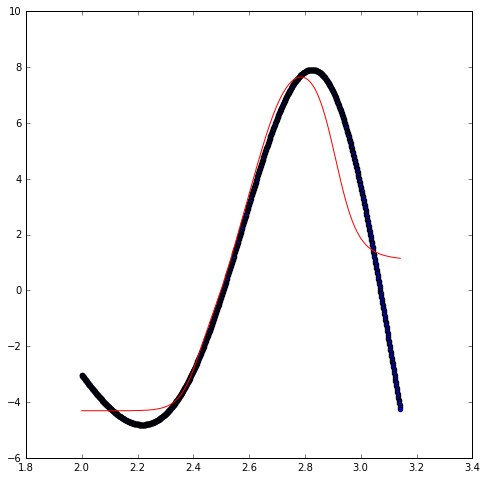

MSE 1.5924780868


In [20]:
## Solution

model = Sequential()
model.add(Dense(input_dim=1, output_dim=5))
model.add(Activation('tanh'))
model.add(Dense(input_dim=5, output_dim=5))
model.add(Activation('tanh'))
model.add(Dense(input_dim=5, output_dim=1))
model.add(Activation('linear'))

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.005))

print('Training..')
loss = model.fit(X, y, nb_epoch=10000, validation_split=0.1, 
                 batch_size=128, verbose=False)
print(loss.history['loss'][-1])
print('Complete')

# Plot
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color='r')
plt.show()
print("MSE", mean_squared_error(predictions, y))

## Exercise

Classify the following data ([source](https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope)). You'll need to translate the classes into integers and make dummies. Design a neural network to classify the data and evaluate the results.

In [5]:
names = "fLength fWidth fSize fConc fConc1 fAsym fM3Long fM3Trans fAlpha fDist class".split()
df = pd.read_csv("data/magic04.data", names=names)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
d = {'g': 0, 'h': 1}
df["class"] = df["class"].apply(lambda x: d[x])

In [25]:
X = np.array(df[df.columns[:-1]])
y = np.array(df["class"])
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

(19020, 10) (19020, 2)


In [26]:
# Define a model
model = Sequential()

# input_dim = number of neurons in previous layer.
# output_dim = number of neurons in current layer.

# First layer - input_dim=k features.
model.add(Dense(input_dim=10, output_dim=6))
model.add(Activation("tanh"))

model.add(Dense(input_dim=6, output_dim=6))
model.add(Activation("tanh"))


# Output layer - output_dim=# of output per point (in y).
# Use 'softmax' for class probability. 'linear' for regression
model.add(Dense(input_dim=6, output_dim=2))
model.add(Activation("softmax"))

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='mse', optimizer=SGD(lr=0.01))

In [ ]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.2, nb_epoch=1000, 
                 batch_size=256, verbose=False)

print(loss.history['loss'][-1])   # displays MSE at last iteration
print("Training complete")

Training...


In [ ]:
# Model evaluation
pred_y = model.predict(X, verbose=False)
preds  = model.predict_classes(X, verbose=False)

print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')